In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

from gui.user_code import get_demsar_diagram, get_demsar_params
from gui.output_utils import *
%load_ext autoreload

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


[268, 269, 270, 271, 272, 273, 274, 275, 276, 277]
Clusters has 5000 values
Accuracy has 5000 values
Composer has 5000 values
folds has 5000 values


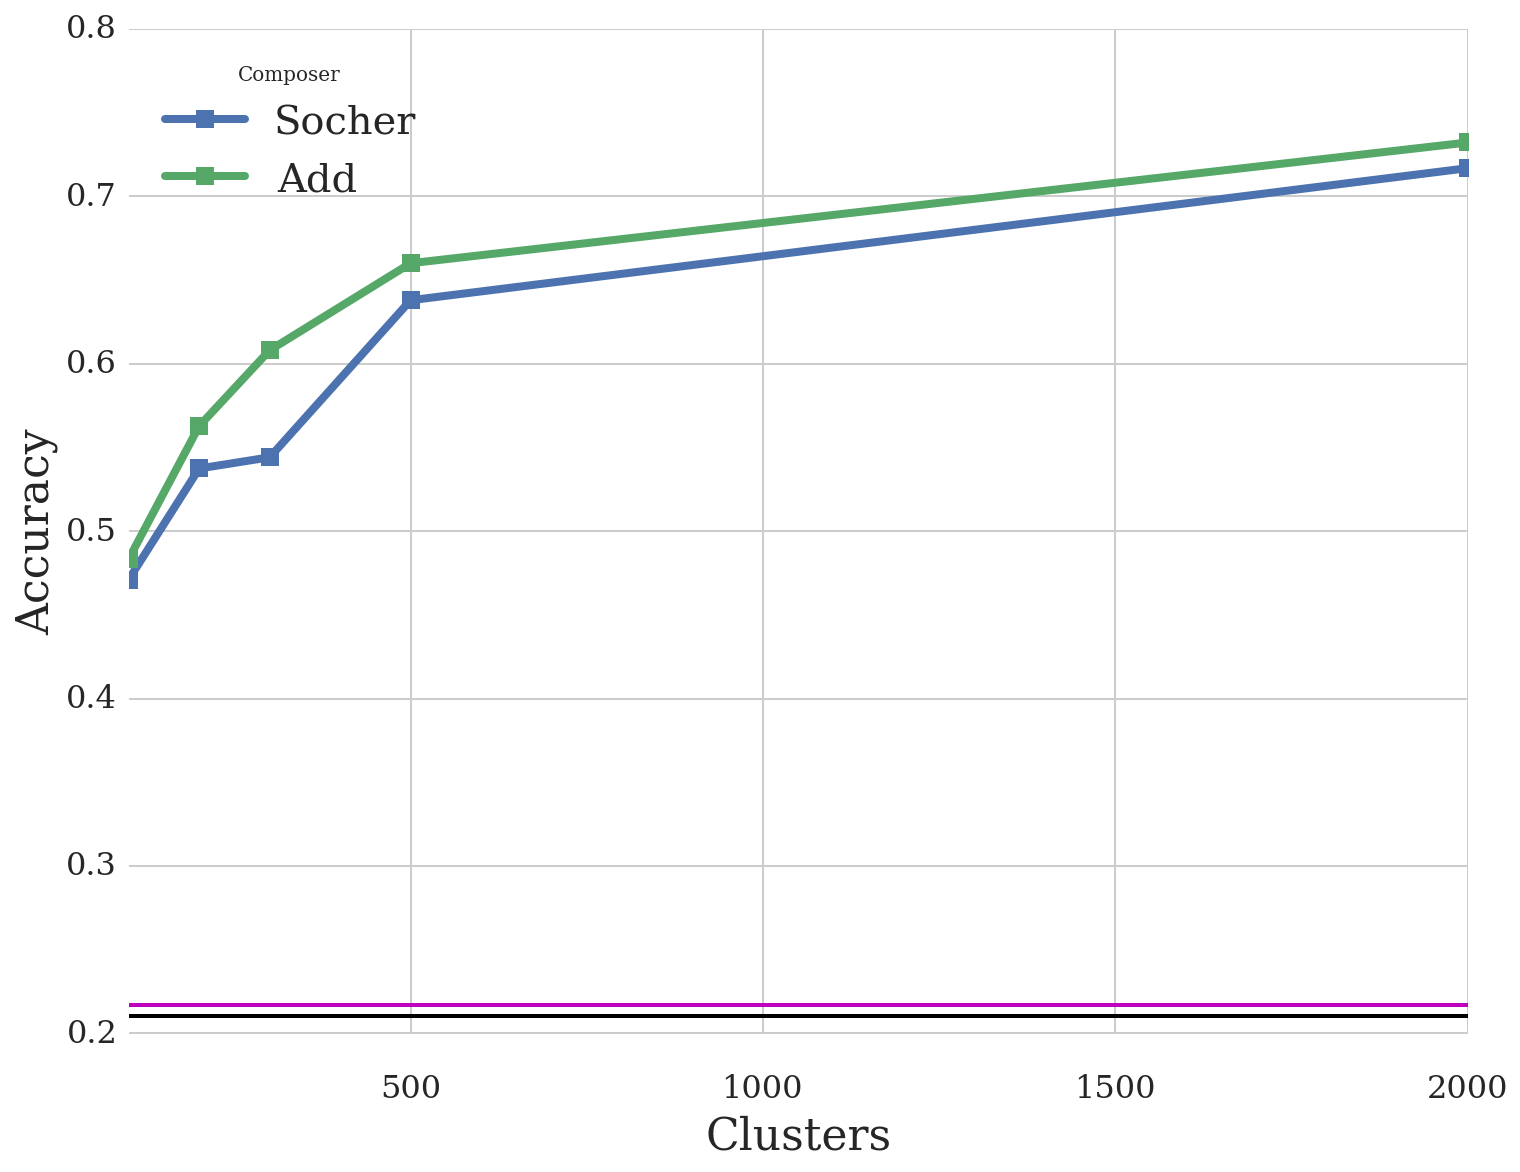

In [8]:
query_dict = {
             'clusters__vectors__algorithm__in': ['turian'],
             'clusters__vectors__composer__in': ['Add', 'Socher'],
             'clusters__vectors__unlabelled__in': ['turian'],
             'clusters__vectors__dimensionality': 100,
             'clusters__vectors__rep': 0,
             'clusters__vectors__unlabelled_percentage': 100,
             'document_features_ev': 'AN+NN',
             'document_features_tr': 'J+N+AN+NN',
             'labelled': 'amazon_grouped-tagged'}
# scores of the same vectors when used to lookup and replace neighbours instead of via clustering
other_dict = {
            'document_features_ev': 'AN+NN',
            'document_features_tr': 'J+N+AN+NN',
            'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
            'expansions__vectors__algorithm': 'turian',
            'expansions__vectors__composer__in': ['Add', 'Socher'],
            'expansions__vectors__dimensionality': 100,
            'expansions__vectors__rep': 0,
            'expansions__vectors__unlabelled': 'turian',
            'expansions__vectors__unlabelled_percentage': 100,
            'labelled': 'amazon_grouped-tagged'}

ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
print(ids)
df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                  'Composer':'clusters__vectors__composer'})
df = df.convert_objects(convert_numeric=True)
sns.tsplot(data=df, time='Clusters', condition='Composer', 
           value='Accuracy', unit='folds',
           marker='s', linewidth=4)

colors = 'mk'
for i, exp in enumerate(Experiment.objects.filter(**other_dict)):
    plt.axhline(Results.objects.get(id=exp.id, classifier=CLASSIFIER).accuracy_mean,
               label='Neigh: %s'%exp.expansions.vectors.composer, c=colors[i])
sns.despine(left=True)

plt.savefig('plot-clusters1.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

[278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297]
Clusters has 10000 values
Accuracy has 10000 values
Composer has 10000 values
folds has 10000 values
Unlabelled has 10000 values


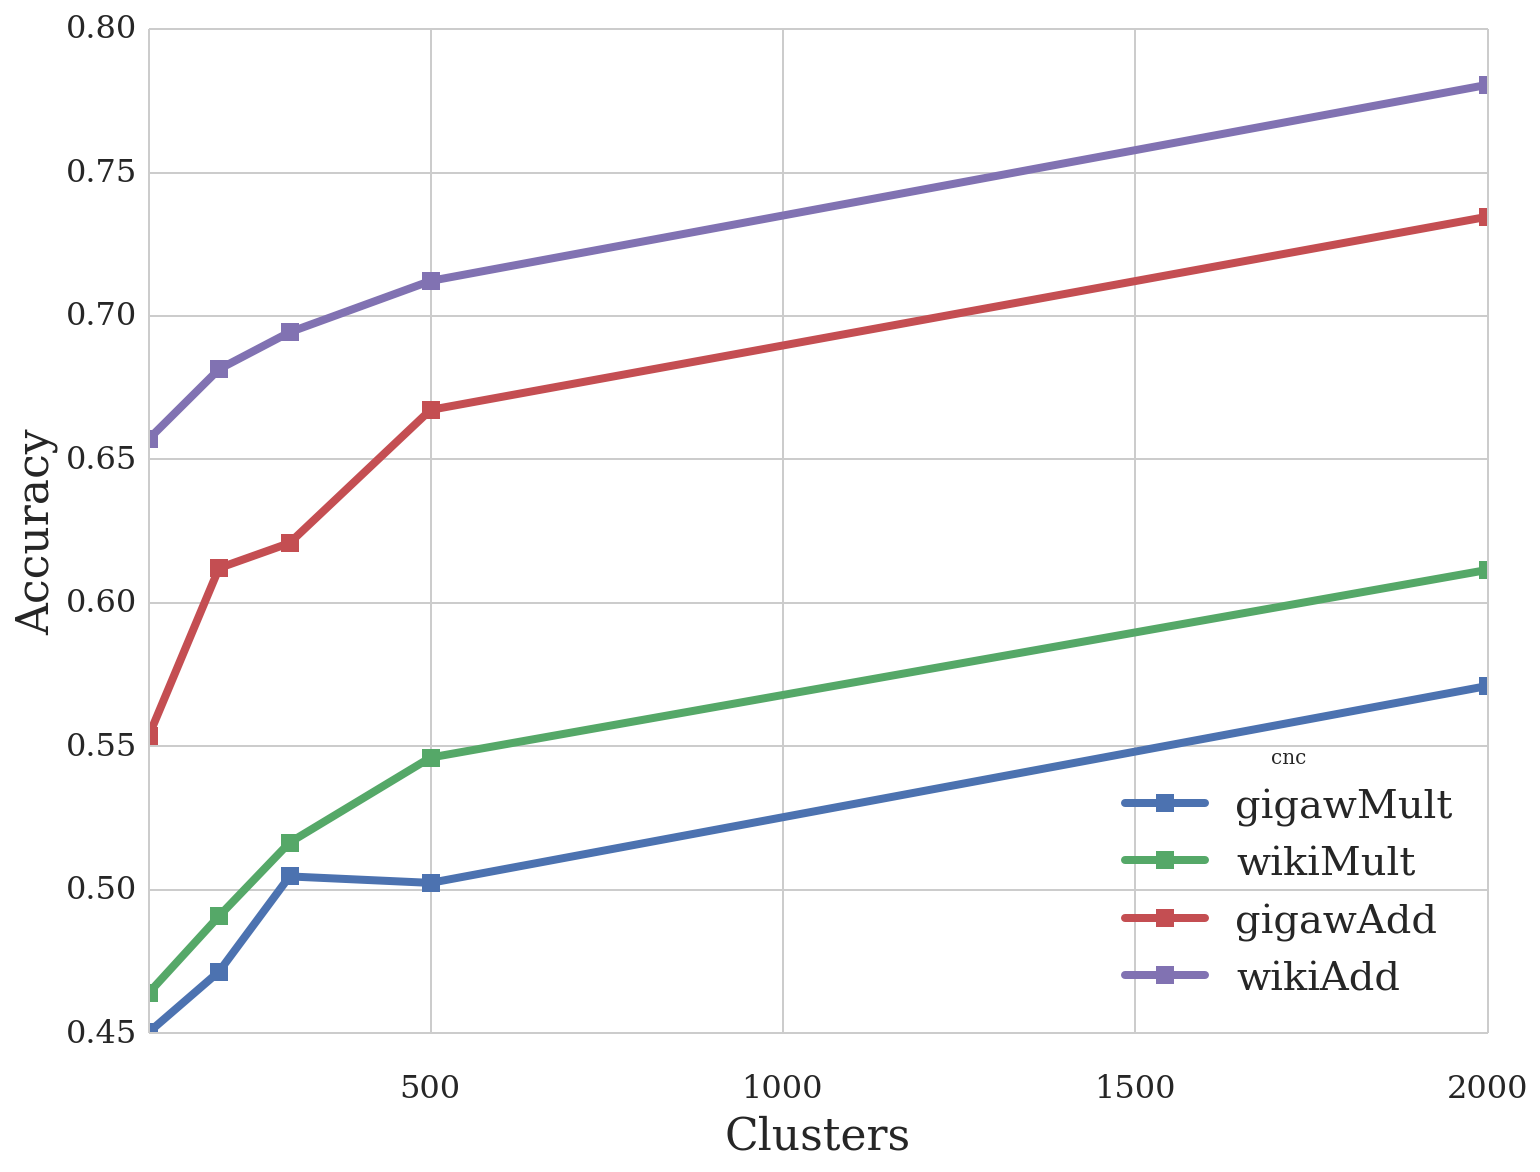

In [11]:
query_dict['clusters__vectors__algorithm__in'] = ['word2vec']
query_dict['clusters__vectors__composer__in'] = ['Add', 'Mult']
query_dict['clusters__vectors__unlabelled__in'] = ['gigaw', 'wiki']

other_dict['expansions__vectors__algorithm'] = 'word2vec'
other_dict['expansions__vectors__composer__in'] = ['Add', 'Mult']
other_dict['expansions__vectors__unlabelled__in'] = ['gigaw', 'wiki']

ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
print(ids)
df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                  'Composer':'clusters__vectors__composer',
                                  'Unlabelled':'clusters__vectors__unlabelled'
                                 })
df = df.convert_objects(convert_numeric=True)
df['cnc'] = df.Unlabelled + df.Composer
sns.tsplot(data=df, time='Clusters', condition='cnc', 
           value='Accuracy', unit='folds',
           marker='s', linewidth=4)

# colors = 'mkcy'
# for i, exp in enumerate(Experiment.objects.filter(**other_dict)):
#     plt.axhline(Results.objects.get(id=exp.id, classifier=CLASSIFIER).accuracy_mean,
#                label='Neigh: %s'%exp.expansions.vectors.composer, c=colors[i])
# sns.despine(left=True)
    
# plt.savefig('plot-clusters2.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)